## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

### Load the **houseprices** data from Thinkful's database.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

### Split your data into train and test sets.
### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [3]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)
## Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

results = sm.OLS(y_train, X_train).fit()

results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     379.0
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:41:42   Log-Likelihood:                -14004.
No. Observations:                1168   AIC:                         2.803e+04
Df Residuals:                    1157   BIC:                         2.809e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.153e+05   1.85e+04     -6.230      0.000   -1.52e+05    -7.9e+04
overallqual  2.323e+04   1232.368     18.850      0.000    2.08e+04    2.56e+04
grlivarea      43.2013      2.749     15.713      0.000      37.807      48.596
garagecars   1.748e+04   3471.074      5.036      0.000    1.07e+04    2.43e+04
garagearea      8.6320     12.001      0.719      0.472     -14.914      32.177
totalbsmtsf    26.4416      3.296      8.024      0.000      19.976      32.908
mszoning_FV  2.392e+04   1.43e+04      1.673      0.095   -4137.142     5.2e+04
mszoning_RH  1.879e+04   1.69e+04      1.114      0.266   -1.43e+04    5.19e+04
mszoning_RL  2.857e+04    1.3e+04      2.190      0.029    2972.390    5.42e+04
mszoning_RM  9326.0670   1.33e+04      0.704      0.482   -1.67e+04    3.53e+04
street_Pave  1159.4000   1.67e+04      0.070      0.945   -3.16e+04    3.39e+04
==============================================================================
Omnibus:                      331.411   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29354.433
Skew:                          -0.151   Prob(JB):                         0.00
Kurtosis:                      27.558   Cond. No.                     5.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* F-statistic: 379.0
* P-val(F-test): 0
* R-squared: 0.766
* adjusted R-squared: 0.764
* AIC: 2.803e+04
* BIC: 2.809e+04


According to the R-squared, around 23% of the variance in the target variable is unexplained by the model.

### Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

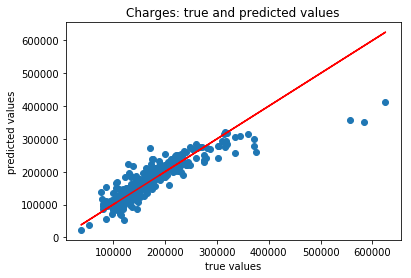

Mean absolute error of the prediction is: 22749.294542568256
Mean squared error of the prediction is: 1233020447.5928094
Root mean squared error of the prediction is: 35114.39089024341
Mean absolute percentage error of the prediction is: 13.581914379173163


In [6]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Try to improve your model in terms of predictive performance by adding or removing some variables.

In [7]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

house_prices_df['int_over_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

# Y is the target variable
Y = np.log1p(house_prices_df['saleprice'])
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:44:17   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      0.000       9.717      10.116
overallqual     0.1893      0.009     20.123      0.000       0.171       0.208
grlivarea     9.58e-05   1.89e-05      5.074      0.000    5.88e-05       0.000
garagecars      0.0779      0.015      5.244      0.000       0.049       0.107
garagearea      0.0001   5.04e-05      2.132      0.033    8.57e-06       0.000
totalsf         0.0003   2.58e-05     11.139      0.000       0.000       0.000
int_over_sf -2.572e-05   3.02e-06     -8.526      0.000   -3.16e-05   -1.98e-05
mszoning_FV     0.3911      0.065      6.055      0.000       0.264       0.518
mszoning_RH     0.2650      0.074      3.593      0.000       0.120       0.410
mszoning_RL     0.3879      0.060      6.481      0.000       0.270       0.505
mszoning_RM     0.2155      0.061      3.556      0.000       0.097       0.334
street_Pave    -0.0556      0.075     -0.744      0.457      -0.202       0.091
==============================================================================
Omnibus:                      350.711   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.386
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      10.094   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* F-statistic: 520.9
* P-val(F-test): 0
* R-squared: 0.832
* adjusted R-squared: 0.831
* AIC: -904.0
* BIC: -843.2


According to the R-squared, around 23% of the variance in the target variable is unexplained by the model.

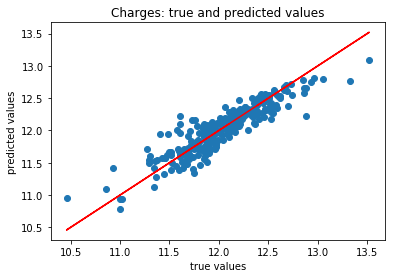

Mean absolute error of the prediction is: 0.12570372872846994
Mean squared error of the prediction is: 0.029192121871241587
Root mean squared error of the prediction is: 0.17085702172062342
Mean absolute percentage error of the prediction is: 1.0503577667814545


In [8]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The second model is the better prediction in the test set.